In [ ]:
#Link to dataset https://www.kaggle.com/tongpython/cat-and-dog/kernels


In [285]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time 
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard 
import random
import pickle
from keras.optimizers import RMSprop
from keras.callbacks import CSVLogger
from livelossplot.inputs.tf_keras import PlotLossesCallback
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
pip install livelossplot

In [ ]:
!unzip drive/MyDrive/archive.zip

In [2]:
dir_file = 'training_set/training_set'
class_category = ["cats", "dogs"]

## **Data processing**




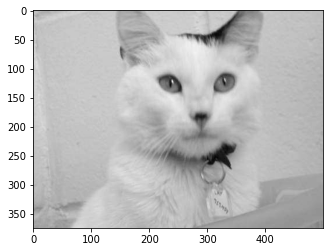

In [84]:
for category in class_category:
    path = os.path.join(dir_file,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) # convert to array
        plt.imshow(img_array, cmap='gray')
        plt.show()

        break
    break


In [206]:
IMG_SIZE = 50

In [207]:
training_data = []
def create_training_data():
    for category in class_category:
        path = os.path.join(dir_file,category)
        class_num = class_category.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e: pass

create_training_data()


100%|██████████| 4006/4006 [00:05<00:00, 797.46it/s]


In [209]:
print(len(training_data))

8005


(8005, 50, 50, 1)

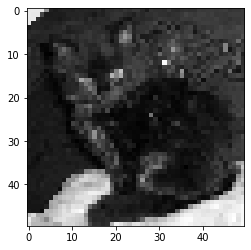

In [314]:
random.shuffle(training_data)
for sample in training_data[:2]:
    plt.imshow(sample[0], cmap = 'gray')

X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X/255.0

y = np.array(y)
X.shape


## **Model 1:**

In [236]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_103 (Conv2D)          (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 7744)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 64)                495680    
_________________________________________________________________
dense_51 (Dense)             (None, 1)               

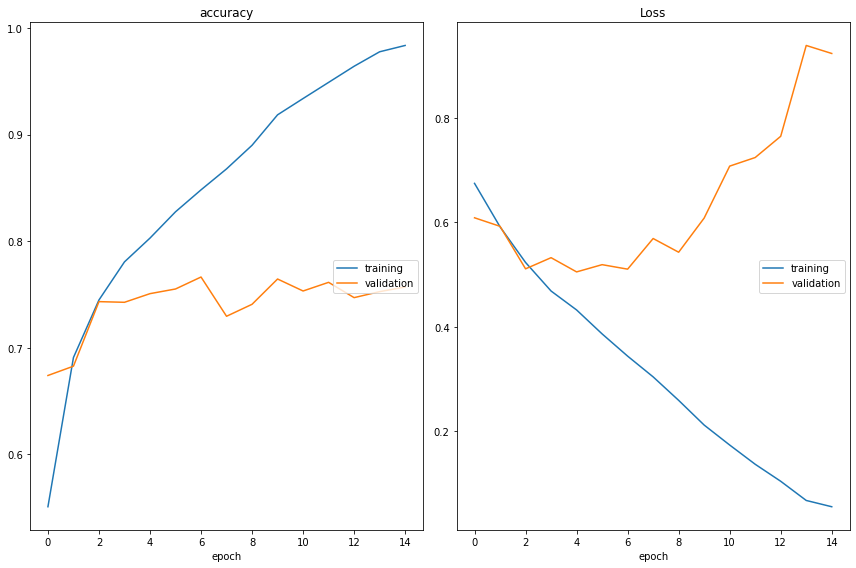

accuracy
	training         	 (min:    0.551, max:    0.984, cur:    0.984)
	validation       	 (min:    0.674, max:    0.766, cur:    0.757)
Loss
	training         	 (min:    0.056, max:    0.675, cur:    0.056)
	validation       	 (min:    0.505, max:    0.939, cur:    0.923)
201/201 [==============================] - 32s 159ms/step - loss: 0.0557 - accuracy: 0.9838 - val_loss: 0.9233 - val_accuracy: 0.7570
INFO:tensorflow:Assets written to: Cat_vs_Dog-CNN.model/assets


In [237]:
history = model.fit(
    X,
    y,
    batch_size=32,
    epochs=15,
    validation_split=0.2,
    callbacks=PlotLossesCallback(), verbose = 1
    )

model.save('Cat_vs_Dog-CNN.model')

In [238]:
def create_testing_data():
    testing_data = []
    dir_file2 = 'test_set/test_set'
    for category in class_category:
        path = os.path.join(dir_file2,category)
        class_num = class_category.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (128, 128))
                testing_data.append([new_array, class_num])
            except Exception as e: pass
    return testing_data

In [240]:
testing_data = create_testing_data()

100%|██████████| 1013/1013 [00:02<00:00, 366.55it/s]


## Result of model 1:

In [340]:
def show_prediction(testing_data, model, IMG_SIZE = 50):
    random.shuffle(testing_data)
    label = ['This is a cat', 'This is a dog']
    i = 0
    plt.figure(figsize = (12,24))
    for sample in testing_data[0:20]:
        plt.subplot(6,5,i+1)
        plt.imshow(sample[0])

        test_img = cv2.cvtColor(sample[0], cv2.COLOR_BGR2GRAY)
        test_img = cv2.resize(test_img, (IMG_SIZE, IMG_SIZE))

        pred = model.predict(test_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255.0)
        pred = round(pred[0][0],1)
        if pred > 0.5: pred = 1
        else: pred = 0
           
        if pred != int(sample[1]):
          plt.xlabel(label[pred] + " WRONG!")
        else : plt.xlabel(label[pred])
        i = i+1

    plt.show()

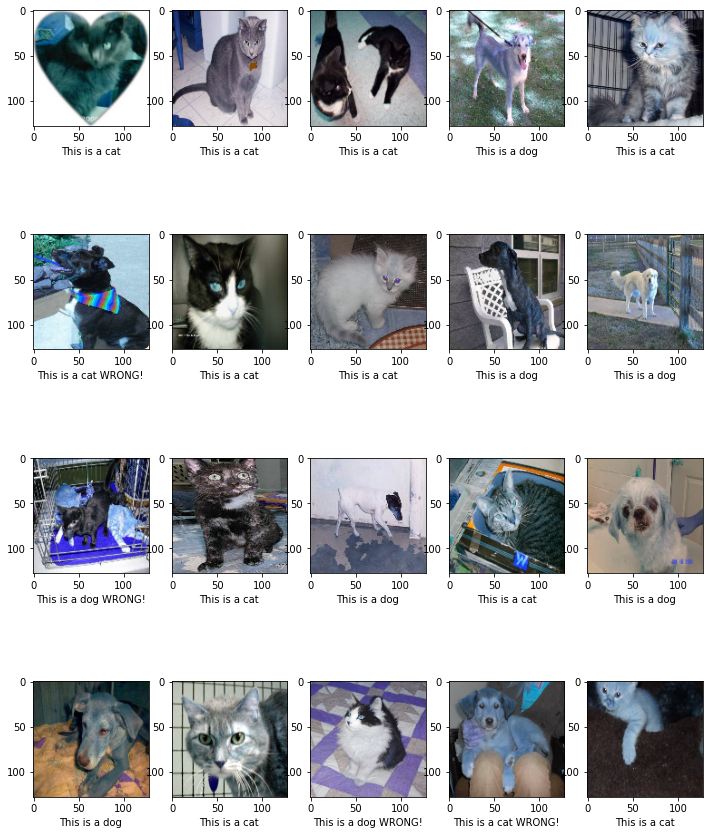

In [341]:
show_prediction(testing_data, model)

In [342]:
x_test = []
y_test = []
for features,label in testing_data:
    test_img = cv2.cvtColor(features, cv2.COLOR_BGR2GRAY)
    test_img = cv2.resize(test_img, (IMG_SIZE, IMG_SIZE))
    x_test.append(test_img)
    y_test.append(label)

x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = x_test/255.0
acc = model.evaluate(x_test, np.array(y_test))

64/64 [==============================] - 2s 38ms/step - loss: 0.9458 - accuracy: 0.7514


In [282]:
print(acc)

[0.9457724094390869, 0.7513593435287476]


## **Model 2:**

## Data augmentation

In [214]:
train_datage = ImageDataGenerator(rotation_range = 15,
                                  zoom_range = 0.20, 
                                  width_shift_range=0.1, 
                                  height_shift_range=0.1, 
                                  horizontal_flip=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
X.shape

(8005, 50, 50, 1)

In [219]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=X.shape[1:], activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.001),
            metrics=['accuracy'])

model2.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_78 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 4, 4, 128)       

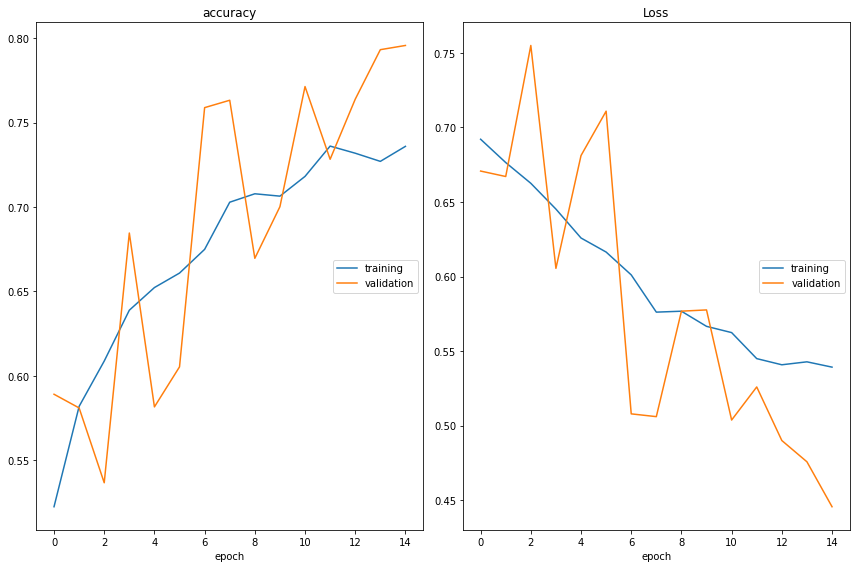

accuracy
	training         	 (min:    0.522, max:    0.736, cur:    0.736)
	validation       	 (min:    0.537, max:    0.796, cur:    0.796)
Loss
	training         	 (min:    0.539, max:    0.692, cur:    0.539)
	validation       	 (min:    0.446, max:    0.755, cur:    0.446)
201/201 [==============================] - 32s 161ms/step - loss: 0.5393 - accuracy: 0.7359 - val_loss: 0.4456 - val_accuracy: 0.7958
INFO:tensorflow:Assets written to: Cat_vs_Dog-CNN2.model/assets


In [220]:
model2.fit_generator(train_datage.flow(X_train, y_train), 
                     validation_data=(X_val, y_val), 
                     epochs = 15, 
                     callbacks=PlotLossesCallback(), 
                     verbose = 1)

model2.save('Cat_vs_Dog-CNN2.model')

## Results of model 2:



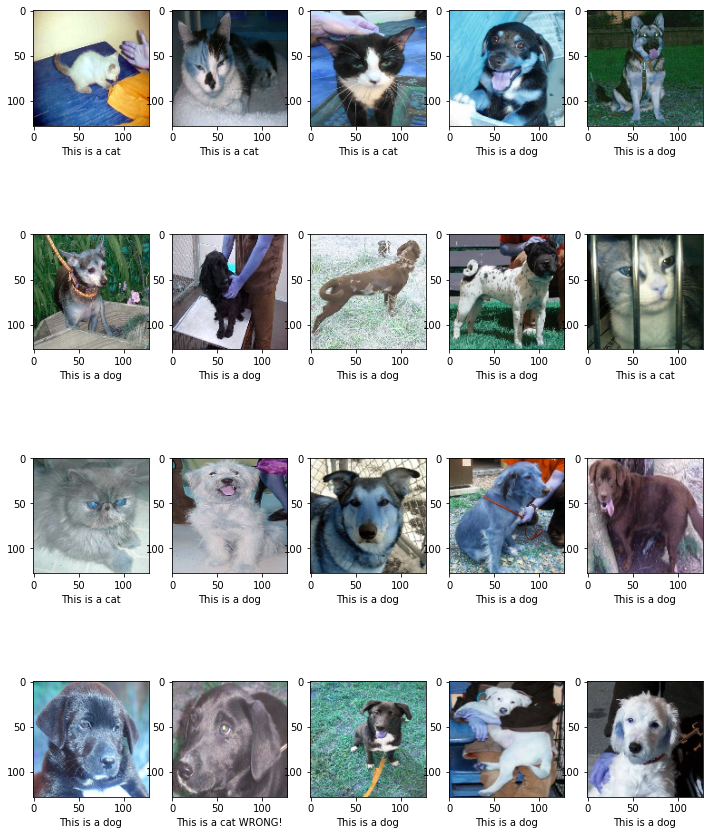

In [347]:
show_prediction(testing_data, model2)

In [333]:
acc = model2.evaluate(x_test, np.array(y_test))

64/64 [==============================] - 2s 33ms/step - loss: 0.4458 - accuracy: 0.8072


## **Model 3:**

In [295]:
training_data3 = []
def create_training_data3():
    for category in class_category:
        path = os.path.join(dir_file,category)
        class_num = class_category.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (100, 100))
                training_data3.append([new_array, class_num])
            except Exception as e: pass

create_training_data3()

100%|██████████| 4006/4006 [00:04<00:00, 810.49it/s]


In [297]:
random.shuffle(training_data3)

X3 = []
y3 = []
for features,label in training_data3:
    X3.append(features)
    y3.append(label)

X3 = np.array(X3).reshape(-1, 100, 100, 1)
X3 = X3/255.0

y3 = np.array(y3)
X3.shape

(8005, 100, 100, 1)

In [299]:
X_train3, X_val3, y_train3, y_val3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [301]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), padding="same", input_shape=X3.shape[1:], activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))


model3.add(Flatten())


model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(1, activation='sigmoid'))


model3.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

model3.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_122 (Conv2D)          (None, 100, 100, 32)      320       
_________________________________________________________________
batch_normalization_14 (Batc (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_98 (Dropout)         (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 50, 50, 64)        18496     
_________________________________________________________________
batch_normalization_15 (Batc (None, 50, 50, 64)        256       
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 25, 25, 64)      

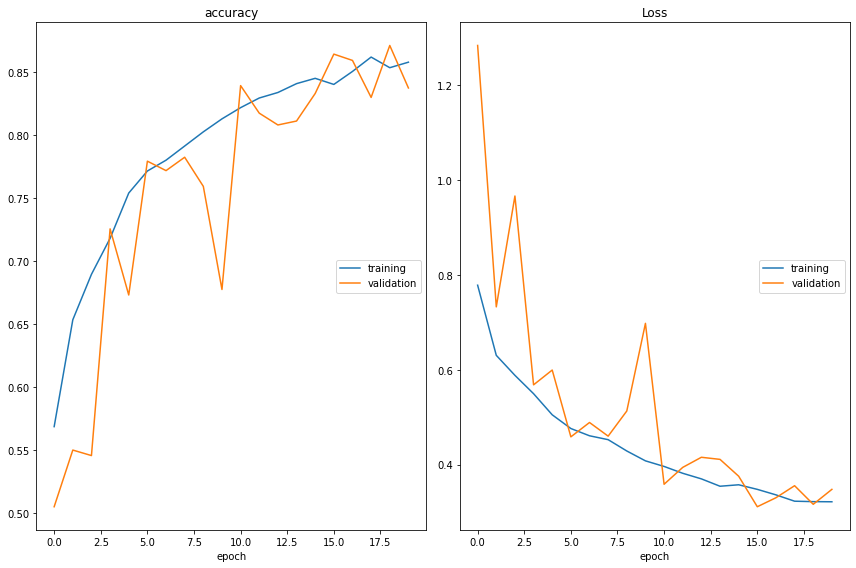

accuracy
	training         	 (min:    0.569, max:    0.862, cur:    0.858)
	validation       	 (min:    0.505, max:    0.871, cur:    0.838)
Loss
	training         	 (min:    0.321, max:    0.778, cur:    0.321)
	validation       	 (min:    0.311, max:    1.284, cur:    0.348)
201/201 [==============================] - 188s 935ms/step - loss: 0.3215 - accuracy: 0.8581 - val_loss: 0.3477 - val_accuracy: 0.8376
INFO:tensorflow:Assets written to: Cat_vs_Dog-CNN3.model/assets


In [302]:
model3.fit_generator(train_datage.flow(X_train3, y_train3), 
                     validation_data=(X_val3, y_val3), 
                     epochs = 20, 
                     callbacks=PlotLossesCallback(), 
                     verbose = 1)

model3.save('Cat_vs_Dog-CNN3.model')

## Results of model 3:

In [353]:
random.shuffle(testing_data)
x_test3 = []
y_test3 = []
for features,label in testing_data:
    test_img = cv2.cvtColor(features, cv2.COLOR_BGR2GRAY)
    test_img = cv2.resize(test_img, (100, 100))
    x_test3.append(test_img)
    y_test3.append(label)

x_test3 = np.array(x_test3).reshape(-1, 100, 100, 1)
x_test3 = x_test3/255.0


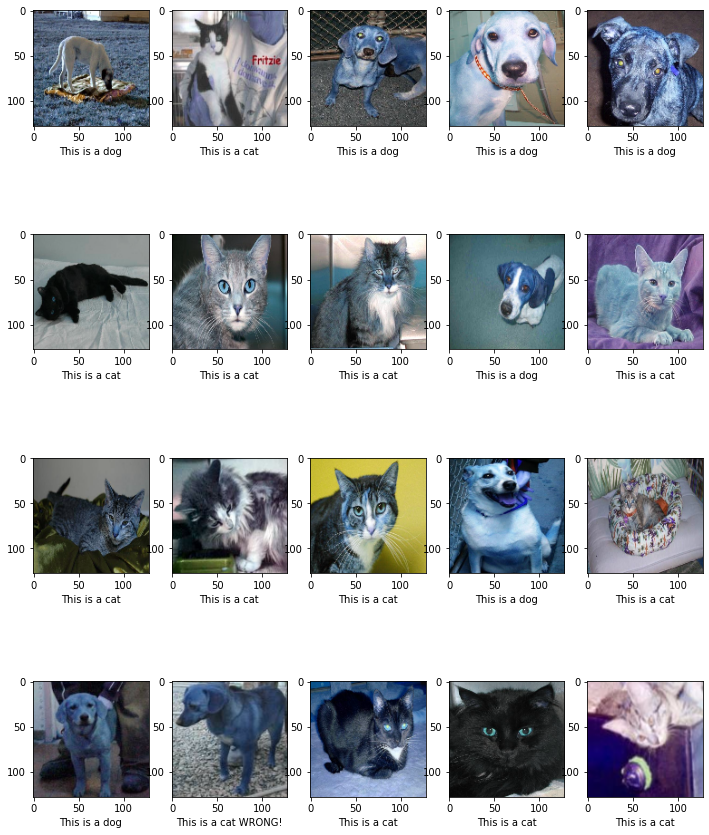

In [349]:
show_prediction(testing_data, model3, 100)

In [357]:
acc = model3.evaluate(x_test3, np.array(y_test3))

64/64 [==============================] - 12s 192ms/step - loss: 0.4610 - accuracy: 0.7696
